<a href="https://colab.research.google.com/github/RAVITEJA-VADLURI/Reinforcement_Learning/blob/main/1795_LabTest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3600341650.py:64: RuntimeWarning: invalid value encountered in scalar subtract
  delta = max(delta, abs(v - best_val))


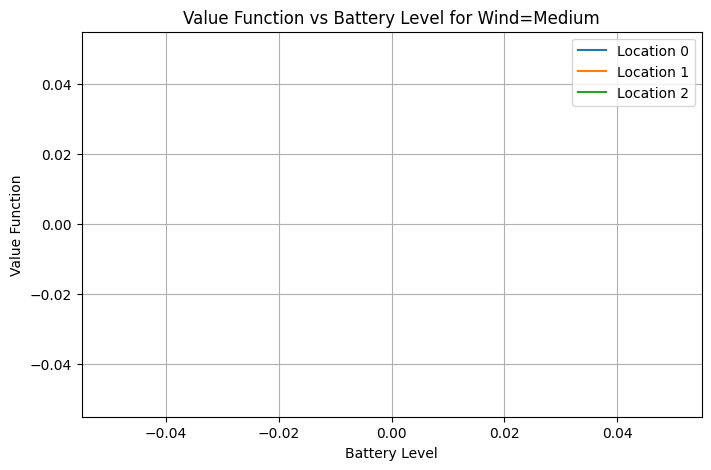

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup
num_locations = 3
wind_states = 3  # low wind(0), medium(1), high(2)
battery_levels = 4  # battery levels from 0 to 3

actions = 2  # 0: deliver (if at location), 1: move to next location

gamma = 0.95

# State space: (location, wind_state, battery_level)
state_space = [(loc, wind, batt) for loc in range(num_locations)
                                      for wind in range(wind_states)
                                      for batt in range(battery_levels)]
n_states = len(state_space)

# Rewards
reward = np.zeros(n_states)
for i, (loc, wind, batt) in enumerate(state_space):
    if loc == num_locations-1 and batt > 0:  # reward for delivery at last location
        reward[i] = 10
    else:
        reward[i] = -1  # cost for moving or waiting

# Initialize value function and policy
value = np.zeros(n_states)
policy = np.zeros(n_states, dtype=int)  # 0: deliver, 1: move

# Value Iteration
theta = 1e-4
while True:
    delta = 0
    for i, (loc, wind, batt) in enumerate(state_space):
        v = value[i]
        action_values = []

        # Deliver action (only at last location and if battery available)
        if loc == num_locations-1 and batt > 0:
            next_batt = max(batt - 1, 0)
            next_state = (loc, np.random.choice(wind_states), next_batt)
            j = state_space.index(next_state)
            val = reward[i] + gamma * value[j]
            action_values.append(val)
        else:
            action_values.append(-np.inf)

        # Move action (if battery available)
        if batt > 0:
            next_loc = (loc + 1) % num_locations
            next_batt = max(batt - 1, 0)
            next_state = (next_loc, np.random.choice(wind_states), next_batt)
            j = state_space.index(next_state)
            val = -1 + gamma * value[j]
            action_values.append(val)
        else:
            action_values.append(-np.inf)

        best_val = max(action_values)
        best_action = np.argmax(action_values)
        value[i] = best_val
        policy[i] = best_action
        delta = max(delta, abs(v - best_val))

    if delta < theta:
        break

# Visualize: plot value function by battery level for fixed wind=medium
fixed_wind = 1
values_for_plot = np.zeros((num_locations, battery_levels))
for loc in range(num_locations):
    for batt in range(battery_levels):
        i = state_space.index((loc, fixed_wind, batt))
        values_for_plot[loc, batt] = value[i]

plt.figure(figsize=(8, 5))
battery_range = range(battery_levels)
for loc in range(num_locations):
    plt.plot(battery_range, values_for_plot[loc], label=f'Location {loc}')

plt.xlabel('Battery Level')
plt.ylabel('Value Function')
plt.title('Value Function vs Battery Level for Wind=Medium')
plt.legend()
plt.grid(True)
plt.show()
